#### Based on GWpy 3.0.1 and PyCBC 2.2.0 documentaton

In [3]:
%matplotlib inline

#### load the necessary packages; the object TimeSeries allows to catch public Ligo data

In [4]:
import matplotlib
from numpy import random
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot

#### get the H1 and L1 signals; plot the signals

In [5]:
h1 = TimeSeries.fetch_open_data('H1', 1126259457, 1126259467)
l1 = TimeSeries.fetch_open_data('L1', 1126259457, 1126259467)

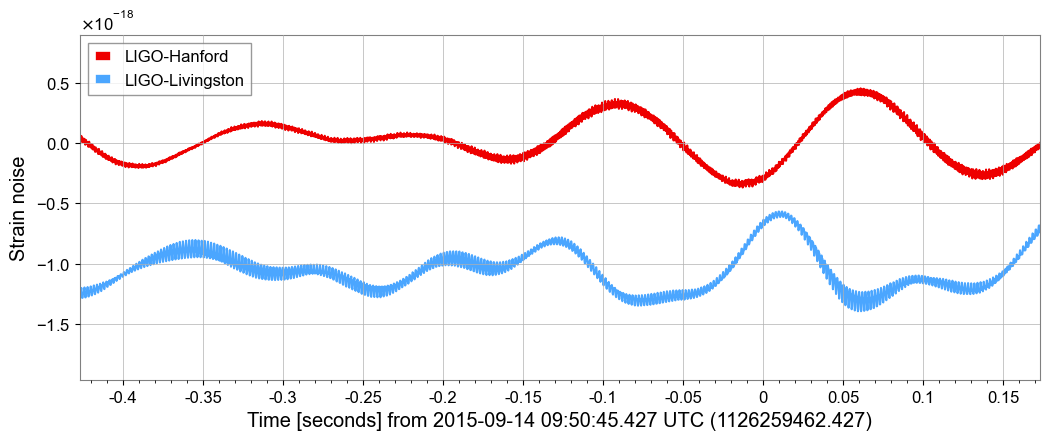

In [12]:
plot = Plot(figsize=(12, 4.8))
ax = plot.add_subplot(xscale='auto-gps')
ax.plot(h1, color='gwpy:ligo-hanford', label='LIGO-Hanford')
ax.plot(l1, color='gwpy:ligo-livingston', label='LIGO-Livingston')
ax.set_epoch(1126259462.427)
ax.set_xlim(1126259462, 1126259462.6)
ax.set_ylabel('Strain noise')
ax.legend()
plot.show()

#### filter data with band-pass filter, eliminates first two harmonics 60Hz; plot the filter

In [6]:
from gwpy.signal.filter_design import bandpass
from gwpy.plot import BodePlot

In [35]:
h1b = h1.bandpass(50, 250).notch(60).notch(120)
l1b = l1.bandpass(50, 250).notch(60).notch(120)

In [38]:
print(h1.sample_rate,l1.sample_rate)

4096.0 Hz 4096.0 Hz


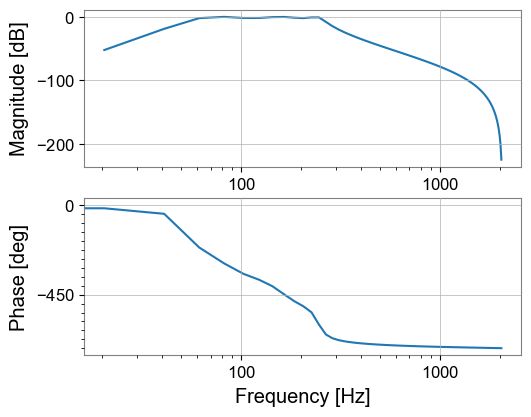

In [39]:
bfilter = bandpass(50, 250, 4096)
plot = BodePlot(bfilter, sample_rate=4096)
plot.show()

#### plot both filtered events, red Handford and blue Livingston

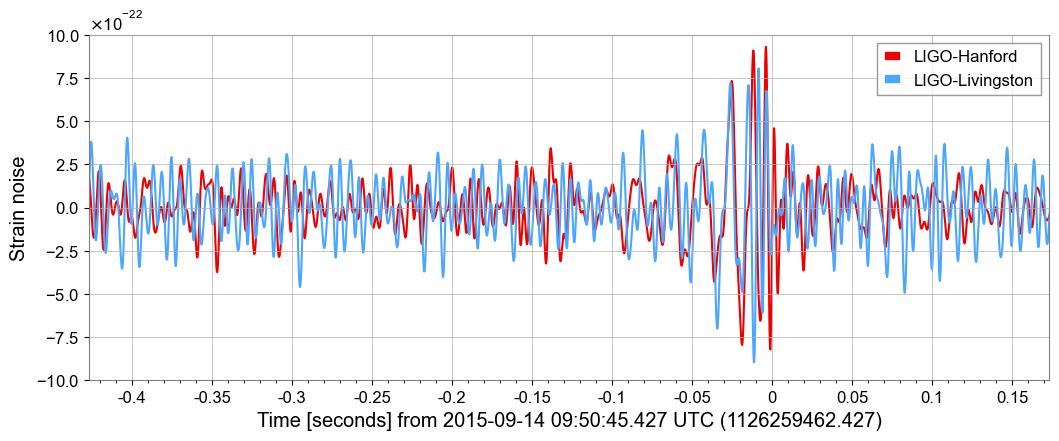

In [7]:
plot = Plot(figsize=(12, 4.8))
ax = plot.add_subplot(xscale='auto-gps')
ax.plot(h1b, color='gwpy:ligo-hanford', label='LIGO-Hanford')
ax.plot(l1b, color='gwpy:ligo-livingston', label='LIGO-Livingston')
ax.set_epoch(1126259462.427)
ax.set_xlim(1126259462, 1126259462.6)
ax.set_ylim(-1e-21, 1e-21)
ax.set_ylabel('Strain noise')
ax.legend()
plot.show()

#### let's plot the frequencies now with the asd method (using signals before filtering, detectors sensitivity)

In [17]:
h1asd = h1.asd(4,2)
l1asd = l1.asd(4,2)

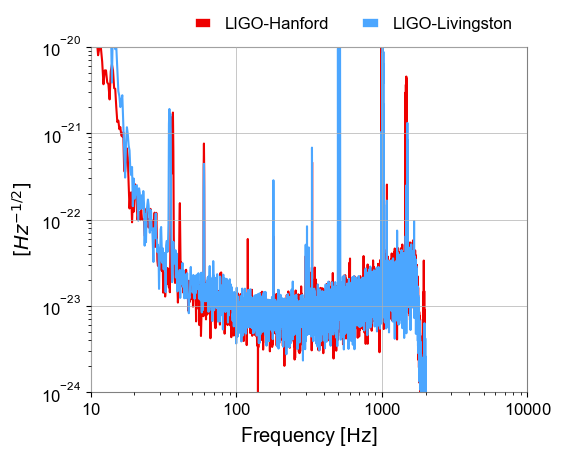

In [32]:
plot = h1asd.plot(label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax = plot.gca()
ax.plot(l1asd, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_xlim(10, 10000)
ax.set_ylim(1e-24, 1e-20)
ax.set_ylabel('$[Hz^{-1/2}]$')
ax.legend(frameon=False, bbox_to_anchor=(1., 1.), loc='lower right', ncol=2)
plot.show()